<a href="https://colab.research.google.com/github/Manojpatil123/DigitRecognition_RANDOMFOREST/blob/main/8_DigitRecognition_RANDOMFOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day - 8 | Digit Recognition using RANDOM FOREST**

# *Importing Basic Library*

In [2]:
import pandas as pd
import numpy as np

### *Access Google Drive contents*

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### *Load Dataset*

In [5]:
fileName = "/content/gdrive/My Drive/data/digit.csv"
dataset = pd.read_csv(fileName)

### *Summarize Dataset*

In [9]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(dataset.shape)
print(dataset.head(5))

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [7]:
X = dataset.iloc[:,1:]
print(X)
print(X.shape)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [8]:
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000,)


### *Splitting Dataset into Test & Train*

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Training*

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',
n_estimators=200,
bootstrap=True,
oob_score=True,
max_features='sqrt')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=200, oob_score=True)

In [16]:
y_pred = model.predict(X_test)

### *Model Accuracy*

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 96.31428571428572%


Predicted 6


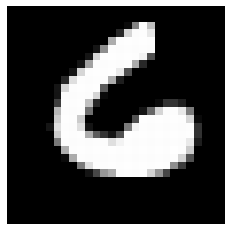

In [20]:
import matplotlib.pyplot as plt
index=100
print("Predicted " + str(model.predict(X_test)[index]))
plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap='gray')